In [13]:
import subprocess
import re
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def executar(programa, np, n):
    """Executa um programa MPI e retorna o tempo de execução."""
    comando = ["mpirun", "-np", str(np), programa]
    entrada = f"{n}\n"
    resultado = subprocess.run(comando, input=entrada.encode(),
                               stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    saida = resultado.stdout.decode()
    match = re.search(r"Tempo total:\s*([0-9.]+)", saida)
    if match:
        return float(match.group(1))
    else:
        return None

def calcular_speedup_eficiencia(tempos):
    base = tempos[1]  # tempo com 1 processo
    speedups = {p: base / t if t else 0 for p, t in tempos.items()}
    eficiencias = {p: speedups[p] / p for p in tempos}
    return speedups, eficiencias

In [15]:
# Execução dos testes
programas = { # nomes e caminhos dos programas
    "Soma de Matrizes": "./soma",
    "Maior Valor": "./maior",
    "Vetor x Matriz": "./vetmat"
}

tamanhos = [1000, 5000, 10000, 20000]
processos = [1, 2, 4, 6, 8]


resultados = {}

for nome, programa in programas.items():
    resultados[nome] = {}
    for n in tamanhos:
        tempos = {}
        for np_ in processos:
            valores = []
            t = executar(programa, np_, n)
            tempos[np_] = t
        resultados[nome][n] = tempos


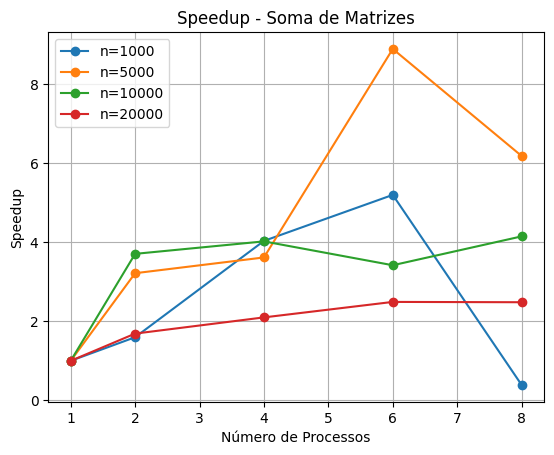

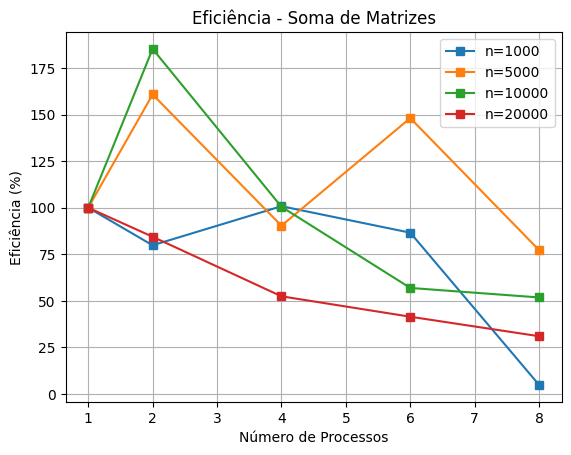

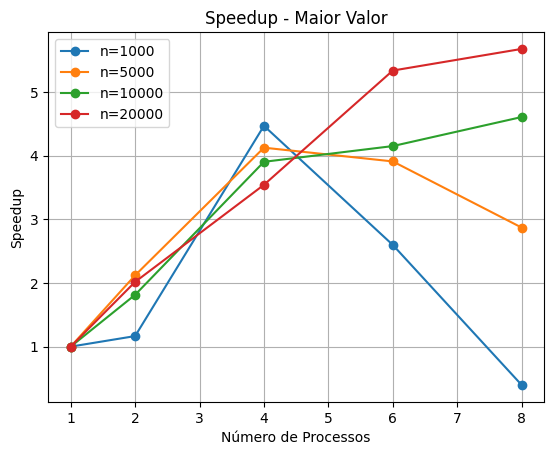

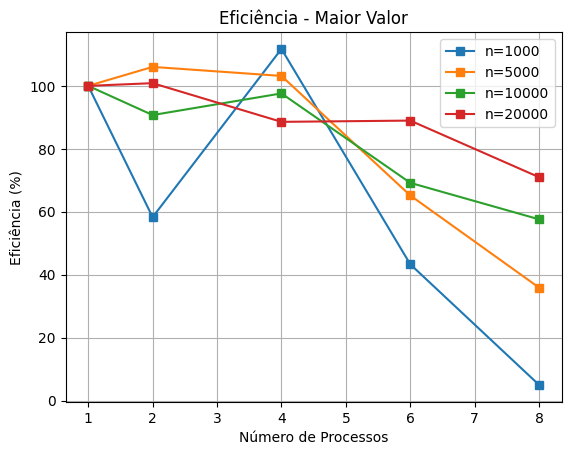

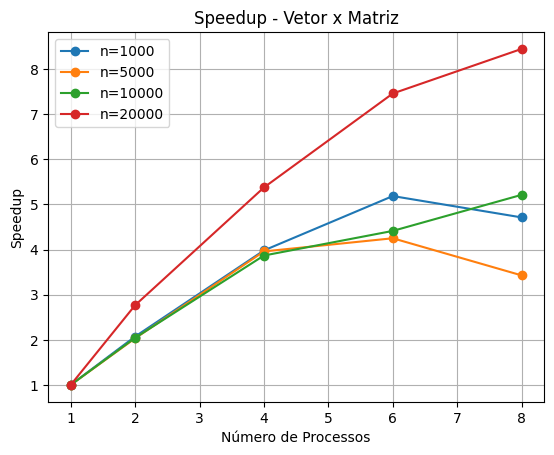

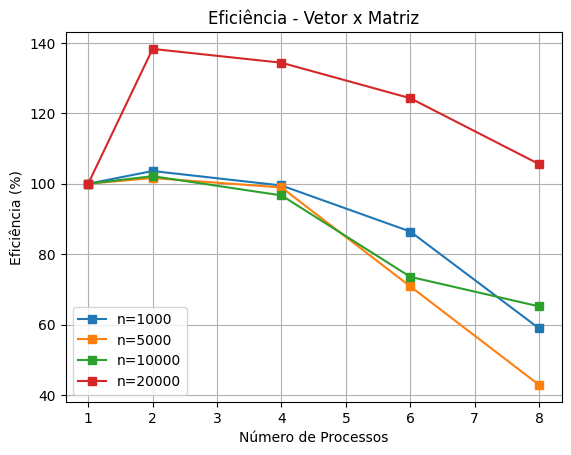

In [16]:
# Plotagem dos resultados
for nome, dados in resultados.items():
    for n, tempos in dados.items():
        speedups, _ = calcular_speedup_eficiencia(tempos)

        plt.plot(processos, [speedups[p] for p in processos],
                 marker='o', label=f'n={n}')

    plt.title(f'Speedup - {nome}')
    plt.xlabel('Número de Processos')
    plt.ylabel('Speedup')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

    for n, tempos in dados.items():
        _, eficiencias = calcular_speedup_eficiencia(tempos)
        plt.plot(processos, [eficiencias[p]*100 for p in processos],
                 marker='s', label=f'n={n}')

    plt.title(f'Eficiência - {nome}')
    plt.xlabel('Número de Processos')
    plt.ylabel('Eficiência (%)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()
